<h1>Unsupervised Learning</h1>
<ul>
    <li>K-means</li>
    <li>Hierarchical Clustering</li>
    <li>GMM</li>
    <li>DBScan</li>
    
</ul>

<h1>Dataset</h1>
<ul>
    <li>Wine Dataset</li>
</ul>

In [1]:
from sklearn.datasets import load_wine
wine_data = load_wine()

<h2>Wine Dataset</h2>

In [2]:
print wine_data.DESCR

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [3]:
print wine_data.data

[[  1.42300000e+01   1.71000000e+00   2.43000000e+00 ...,   1.04000000e+00
    3.92000000e+00   1.06500000e+03]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00 ...,   1.05000000e+00
    3.40000000e+00   1.05000000e+03]
 [  1.31600000e+01   2.36000000e+00   2.67000000e+00 ...,   1.03000000e+00
    3.17000000e+00   1.18500000e+03]
 ..., 
 [  1.32700000e+01   4.28000000e+00   2.26000000e+00 ...,   5.90000000e-01
    1.56000000e+00   8.35000000e+02]
 [  1.31700000e+01   2.59000000e+00   2.37000000e+00 ...,   6.00000000e-01
    1.62000000e+00   8.40000000e+02]
 [  1.41300000e+01   4.10000000e+00   2.74000000e+00 ...,   6.10000000e-01
    1.60000000e+00   5.60000000e+02]]


<h2>Types of Input Data</h2>
<ul>
    <li>One Mode Matrix</li>
    <li>Two Mode Matrix</li>
</ul>

Data Matrix (Two mode Matrix)
    <li>n object with p attributes</li>
    <li>n * p matrix</li>


In [4]:
two_mode_data = load_wine().data
print type(two_mode_data)
print two_mode_data.shape

<type 'numpy.ndarray'>
(178L, 13L)


Dissimilarity Matrix ( One mode matrix)
<li>object by object</li>
<li> n * n matrix</li>    

How do we transform two mode data into one mode data<br>

<p>L1 (manhattan) $|x_{1}-x_{2}|+|y_{1}-y_{2}|.$</p>

<p>L2 (euclidean) $\sqrt{(x_{1}-x_{2})^{2}+(y_{1}-y_{2})^{2}}.$</p>

<p>cosine $\frac {x \cdot y}{||x|| \cdot ||y||}$</p>

<p style="color:red">we can use sklearn.metrics.pairwise</p>

In [5]:
from sklearn.metrics import pairwise
#manhattan
one_mode_L1_data = pairwise.manhattan_distances(load_wine().data,load_wine().data)
#euclidean
one_mode_L2_data = pairwise.euclidean_distances(load_wine().data,load_wine().data)




In [6]:
print one_mode_L1_data.shape
print one_mode_L1_data[0]
print one_mode_L2_data[0]

(178L, 178L)
[   0.         51.06      152.48      435.09      349.97      403.87
  259.26      241.56       54.48       53.04      471.74      252.49
  296.08      129.02      515.66      266.56      229.28       85.71      641.3
  235.56      287.61      329.54       60.71       89.69      260.06
  253.69      168.32      260.71      177.45       64.34      255.79
  478.21      104.59      182.82       55.72      179.39      207.33
   77.48       80.85      312.36      283.2        77.42       59.67
  417.98      204.82       39.34       29.47      109.1        34.75
  221.24      128.46      236.5       147.38      327.33       17.66
   73.86      107.04      235.15      244.87      603.68      423.84      652.4
  478.99      694.78      747.26      424.89      616.64      615.4       343.78
  382.38      235.544     710.39      648.89      111.9       218.98
  678.34      722.51      594.95      334.42      644.16      841.19
  401.35      503.41      608.91      589.01      654.42

<h2>K-Means</h2>
<ul>
    <li>sklearn.cluster.Kmeans</li>
    <li>input
    <ul>
        <li>k clusters</li>
        <li>data (n object with p attribute)</li>
    </ul>
</ul>

n_clusters<br>
&nbsp;&nbsp;&nbsp;the number of clusters to form as well as the number of centroids to generate<br>
random_state

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(two_mode_data)
print kmeans.labels_

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [8]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
result = model.fit_transform(two_mode_data)
print result

[[ -8.36077595   7.2849021 ]
 [ -8.53516197   6.52063942]
 [-10.26767826   8.3820467 ]
 [-12.37274551  10.30195427]
 [ -2.06231618   1.26026249]
 [-12.46025944   9.9488306 ]
 [-11.23775291   9.5406208 ]
 [-11.71478271   9.08666897]
 [ -8.03316593   6.94692612]
 [ -8.42941189   6.43167448]
 [-12.61712456  10.27634716]
 [-11.08740616   9.45271587]
 [-11.56860161   9.68096352]
 [ -9.79683685   7.97825718]
 [-12.71835995  10.3814621 ]
 [-11.71982574   9.35959339]
 [-11.54921532   8.86125278]
 [ -9.52083397   7.723773  ]
 [-12.91493607  10.55104351]
 [ -4.6251421    3.43368649]
 [ -3.14234877   2.24736857]
 [ -2.71136093   2.20888162]
 [ -7.8905015    6.73598719]
 [ -7.68187952   6.40010166]
 [ -4.37542105   3.80056858]
 [ -4.18484735   3.20568061]
 [-10.42653751   8.47989178]
 [-11.15320683   9.50528812]
 [ -5.74079323   4.58552551]
 [ -7.8804822    6.74764872]
 [-11.57347965   8.9817667 ]
 [-12.68220329  10.23360348]
 [ -7.44317913   5.95388842]
 [-10.98907185   8.63161564]
 [ -9.13307762

In [9]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 4.0
fig_size[1] = 3.0
plt.rcParams["figure.figsize"] = fig_size
        



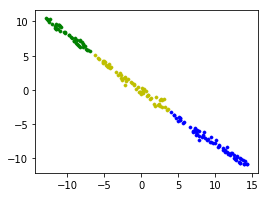

In [10]:
result_0 = np.array([result[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 0])
result_1 = np.array([result[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 1])
result_2 = np.array([result[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 2])

plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=10)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=10)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=10)
flg_kmeans = plt

<h2>Hierarchical Clustering</h2>
<ul>
<li>sklearn.cluster.AgglomerativeClustering
<li>input
    <ul>
        <li>data (n objects by n objects)</li>
    </ul>
</ul>

n_clusters<br>
&nbsp;&nbsp;&nbsp;The number of clusters to find<br>
affinity<br>
&nbsp;&nbsp;&nbsp;Can be 'euclidean'(default), 'L1', 'L2', 'manhattan', 'cosine' or 'precomputed'<br>
linkage<br>
&nbsp;&nbsp;&nbsp;'ward', 'complete', 'average'
<p style="color:red">If linkage is “ward”, only “euclidean” is accepted</p>

In [11]:
from sklearn.cluster import AgglomerativeClustering
L2_hierarchical_1 = AgglomerativeClustering(n_clusters=6, linkage='complete').fit(two_mode_data)
L2_hierarchical_2 = AgglomerativeClustering(n_clusters=6, linkage='complete',affinity='precomputed').fit(one_mode_L2_data)
print L2_hierarchical_1.labels_
print L2_hierarchical_2.labels_

[2 2 2 1 0 1 5 5 2 2 1 5 5 2 1 5 5 2 1 0 0 0 2 2 0 0 2 5 0 2 5 1 0 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 0 2 5 2 5 2 5 2 2 0 5 5 3 0 3 3 4 4 0 3 3 0 0 0 4 3 0
 0 4 4 3 0 3 4 0 3 3 3 3 3 3 0 3 3 3 3 4 4 0 3 4 0 4 0 3 4 4 0 4 3 3 4 0 3
 4 3 4 4 4 3 4 4 3 3 3 4 4 4 4 4 3 4 3 3 3 3 3 0 0 0 3 3 3 3 0 3 3 0 0 4 3
 0 3 3 3 4 0 3 0 3 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 0 0 3]
[2 2 2 1 0 1 5 5 2 2 1 5 5 2 1 5 5 2 1 0 0 0 2 2 0 0 2 5 0 2 5 1 0 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 0 2 5 2 5 2 5 2 2 0 5 5 3 0 3 3 4 4 0 3 3 0 0 0 4 3 0
 0 4 4 3 0 3 4 0 3 3 3 3 3 3 0 3 3 3 3 4 4 0 3 4 0 4 0 3 4 4 0 4 3 3 4 0 3
 4 3 4 4 4 3 4 4 3 3 3 4 4 4 4 4 3 4 3 3 3 3 3 0 0 0 3 3 3 3 0 3 3 0 0 4 3
 0 3 3 3 4 0 3 0 3 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 0 0 3]


In [12]:
hierarchical_example = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(two_mode_data)

In [13]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 4.0
fig_size[1] = 3.0
plt.rcParams["figure.figsize"] = fig_size

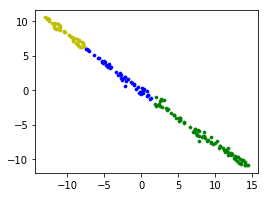

In [14]:
result_0 = np.array([result[i] for i in range(len(hierarchical_example.labels_)) if hierarchical_example.labels_[i] == 0])
result_1 = np.array([result[i] for i in range(len(hierarchical_example.labels_)) if hierarchical_example.labels_[i] == 1])
result_2 = np.array([result[i] for i in range(len(hierarchical_example.labels_)) if hierarchical_example.labels_[i] == 2])

plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=10)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=10)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=10)
flg_hierarchical = plt

<h2>Gaussian Mixture Mode</h2>
<ul>
<li>sklearn.mixture.GaussianMixture
<li>input
    <ul>
        <li>k clusters
        <li>data (n object with p attributes)</li>
    </ul>
</ul>

n_components<br>
&nbsp;&nbsp;&nbsp;The number of mixture components<br>
covariance_type<br>
&nbsp;&nbsp;&nbsp;‘full’, ‘tied’, ‘diag’, ‘spherical’<br> 
random_state<br>

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,random_state=0)
gmm.fit(two_mode_data)
gmm_labels = gmm.predict(two_mode_data)
print gmm_labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 2 2 1 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 1 2 2 0 1 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 1 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 4.0
fig_size[1] = 3.0
plt.rcParams["figure.figsize"] = fig_size

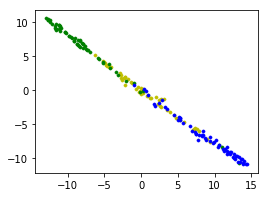

In [17]:
result_0 = np.array([result[i] for i in range(len(gmm_labels)) if gmm_labels[i] == 0])
result_1 = np.array([result[i] for i in range(len(gmm_labels)) if gmm_labels[i] == 1])
result_2 = np.array([result[i] for i in range(len(gmm_labels)) if gmm_labels[i] == 2])

plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=10)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=10)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=10)
flg_gmm = plt

<h2>DBScan</h2>
<ul>
<li>sklearn.cluster.DBSCAN
<li>input
    <ul>
        <li>Eps</li>
        <li>MinPts</li>
        <li>data (n object with p attributes)</li>
    </ul>
</ul>

eps<br>
&nbsp;&nbsp;&nbsp;The maximum distance between two samples for them to be considered as in the same neighborhood<br>
min_samples<br>
&nbsp;&nbsp;&nbsp;The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

In [18]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=30, min_samples=9)
dbscan.fit(two_mode_data)
dbscan_labels = dbscan.labels_
print dbscan_labels

[ 0  0 -1 -1 -1 -1  1  1  0  0 -1  1 -1 -1 -1  1  1 -1 -1  3 -1 -1  0  0  3
  3 -1  1 -1  0  1 -1 -1 -1 -1 -1  3 -1  0 -1 -1  0 -1  2 -1  0  0 -1  0  1
 -1  1 -1 -1  0 -1 -1  1  1  2  2  2  2  2  2  2  2  2 -1 -1  3  2  2 -1 -1
  2  2  2 -1  2 -1  2  2  2  2  2  2  2  2  2  2  2  2 -1  2 -1  2  2  2  2
  2  2  2  2  2 -1  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  3  3  2  2  2  2
  2  2  2  2  2 -1  2 -1  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2 -1 -1
  3  3  2]


In [19]:
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print n_clusters

4


In [20]:
for index in range(n_clusters):
    print index, ":", dbscan_labels.tolist().count(index)
print "outlier : ", dbscan_labels.tolist().count(-1)

0 : 13
1 : 11
2 : 99
3 : 9
outlier :  46


In [21]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 8.0
fig_size[1] = 6
.0
plt.rcParams["figure.figsize"] = fig_size

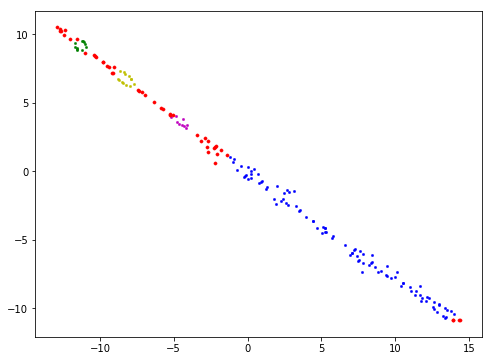

In [22]:
result_0 = np.array([result[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == 0])
result_1 = np.array([result[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == 1])
result_2 = np.array([result[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == 2])
result_3 = np.array([result[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == 3])
outlier = np.array([result[i] for i in range(len(dbscan_labels)) if dbscan_labels[i] == -1])


plt.scatter(result_0[:,0], result_0[:,1], c='y', linewidths=0.5, s=5)
plt.scatter(result_1[:,0], result_1[:,1], c='g', linewidths=0.5, s=5)
plt.scatter(result_2[:,0], result_2[:,1], c='b', linewidths=0.5, s=5)
plt.scatter(result_3[:,0], result_3[:,1], c='m', linewidths=0.5, s=5)
plt.scatter(outlier[:,0], outlier[:,1], c='r', linewidths=0.5, s=10)
flg_gmm = plt